In [73]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [74]:
df = pd.read_csv('./data/MBA.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


In [75]:
df.describe()

,application_id,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000,6194.000000
mean,3097.500000,3.250714,651.092993,5.016952
std,1788.198115,0.151541,49.294883,1.032432
min,1.000000,2.650000,570.000000,1.000000
25%,1549.250000,3.150000,610.000000,4.000000
50%,3097.500000,3.250000,650.000000,5.000000
75%,4645.750000,3.350000,680.000000,6.000000
max,6194.000000,3.770000,780.000000,9.000000


In [76]:
df

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN
...,...,...,...,...,...,...,...,...,...,...
6189,6190,Male,False,3.49,Business,White,640.0,5.0,Other,NaN
6190,6191,Male,False,3.18,STEM,Black,670.0,4.0,Consulting,NaN
6191,6192,Female,True,3.22,Business,NaN,680.0,5.0,Health Care,Admit
6192,6193,Male,True,3.36,Business,NaN,590.0,5.0,Other,NaN


In [77]:
df = pd.read_csv('./data/MBA.csv')

df.drop('application_id', axis=1, inplace=True)  # 'application_id' 열 삭제

df.loc[df['international'] == True, 'race'] = df['race'].fillna('international')
df.drop('international', axis=1, inplace=True)

df['admission'].fillna('decline', inplace=True)
df['admission'].replace('Waitlist', 'decline', inplace=True)
df['admission'] = df['admission'].replace({'decline': 0, 'Admit': 1})

C:\Users\playdata2\AppData\Local\Temp\ipykernel_10076\176441518.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['admission'].fillna('decline', inplace=True)
C:\Users\playdata2\AppData\Local\Temp\ipykernel_10076\176441518.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['admission'] = d

C:\Users\playdata2\AppData\Local\Temp\ipykernel_10076\729236830.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='major', ax=ax[1], palette='Set2', width=0.5)
C:\Users\playdata2\AppData\Local\Temp\ipykernel_10076\729236830.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='race', ax=ax[2], palette='pastel', width=0.7)


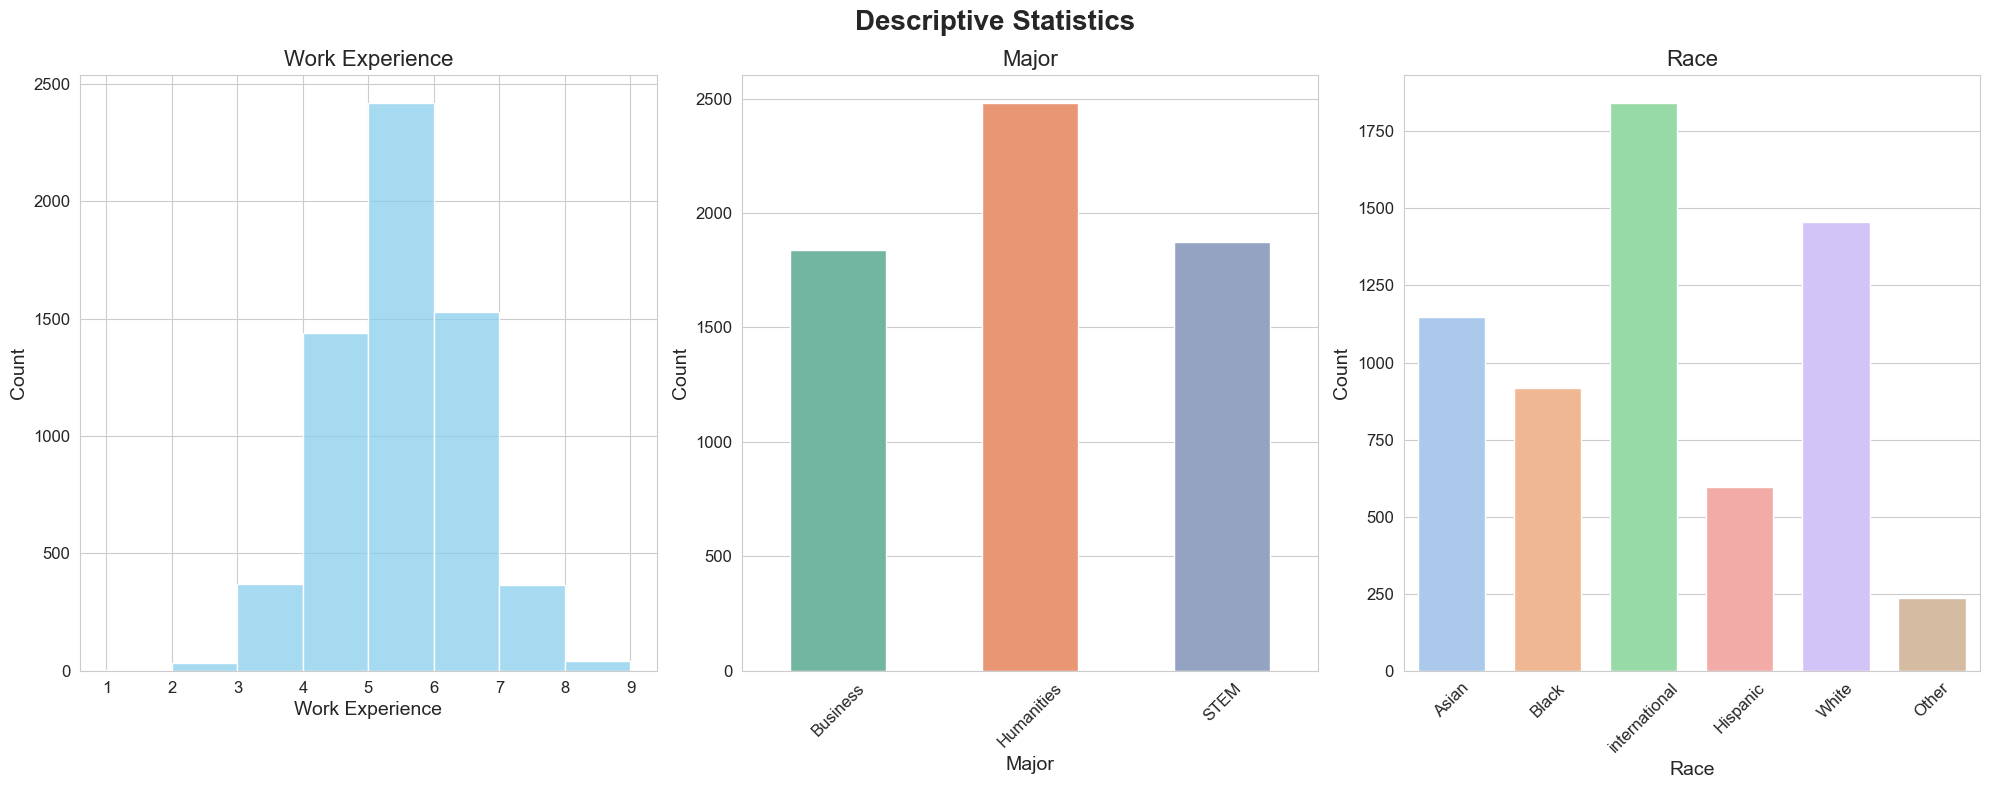

In [78]:
import matplotlib.font_manager as fm

font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font)

# 스타일 설정
sns.set_style("whitegrid")

# subplots 설정
fig, ax = plt.subplots(1, 3, figsize=(20, 8))

# 업무 경험 연차별 지원자수 histogram
sns.histplot(data=df, x='work_exp', stat='count', ax=ax[0], binwidth=1, color='skyblue')
ax[0].set_title('Work Experience', fontsize=16)
ax[0].set_xlabel('Work Experience', fontsize=14)
ax[0].set_ylabel('Count', fontsize=14)
ax[0].tick_params(axis='x', labelsize=12)
ax[0].tick_params(axis='y', labelsize=12)

# 전공별 지원자 수 countplot
sns.countplot(data=df, x='major', ax=ax[1], palette='Set2', width=0.5)
ax[1].set_title('Major', fontsize=16)
ax[1].set_xlabel('Major', fontsize=14)
ax[1].set_ylabel('Count', fontsize=14)
ax[1].tick_params(axis='x', labelsize=12, rotation=45)
ax[1].tick_params(axis='y', labelsize=12)

# 인종별 지원자 수 countplot
sns.countplot(data=df, x='race', ax=ax[2], palette='pastel', width=0.7)
ax[2].set_title('Race', fontsize=16)
ax[2].set_xlabel('Race', fontsize=14)
ax[2].set_ylabel('Count', fontsize=14)
ax[2].tick_params(axis='x', labelsize=12, rotation=45)
ax[2].tick_params(axis='y', labelsize=12)

# 전체 제목 설정 및 여백 조정
plt.suptitle('Descriptive Statistics', fontsize=20, weight='bold')
plt.tight_layout()  # 제목과 서브플롯 간의 간격 조정
plt.show()

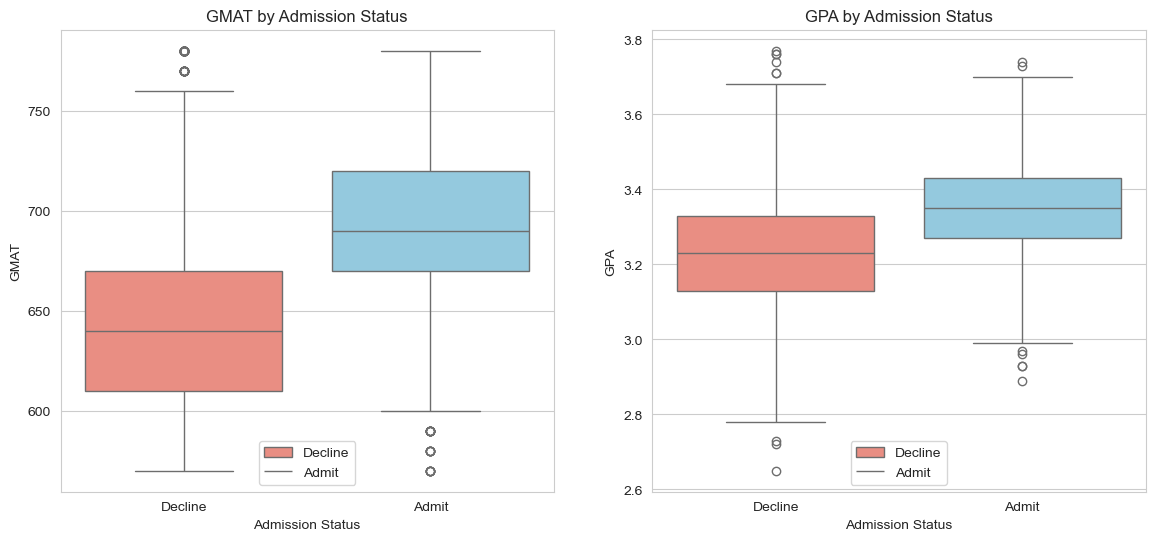

In [79]:
plt.figure(figsize=(14, 6), facecolor='white')

palette = {1: 'skyblue', 0: 'salmon'}  # '1': 합격, '0':불합격

# gmat에 따른 합격 여부
plt.subplot(1, 2, 1)
sns.boxplot(x='admission', y='gmat', data=df, hue='admission', palette=palette, dodge=False)
plt.title('GMAT by Admission Status')
plt.xlabel('Admission Status')
plt.ylabel('GMAT')
plt.legend(loc='lower center',labels=['Decline', 'Admit'])
plt.xticks(ticks=[0, 1], labels=['Decline', 'Admit']) 
plt.savefig('GMAT_boxplot',dpi=800)
# gpa에 따른 합격 여부
plt.subplot(1, 2, 2)
sns.boxplot(x='admission', y='gpa', data=df, hue='admission', palette=palette, dodge=False, whis = 1.8)
plt.title('GPA by Admission Status')
plt.xlabel('Admission Status')
plt.ylabel('GPA')
plt.xticks(ticks=[0, 1], labels=['Decline', 'Admit']) 
plt.legend(loc='lower center',labels=['Decline', 'Admit'])
plt.savefig('Boxplot_GAMT & GPA',dpi=800)

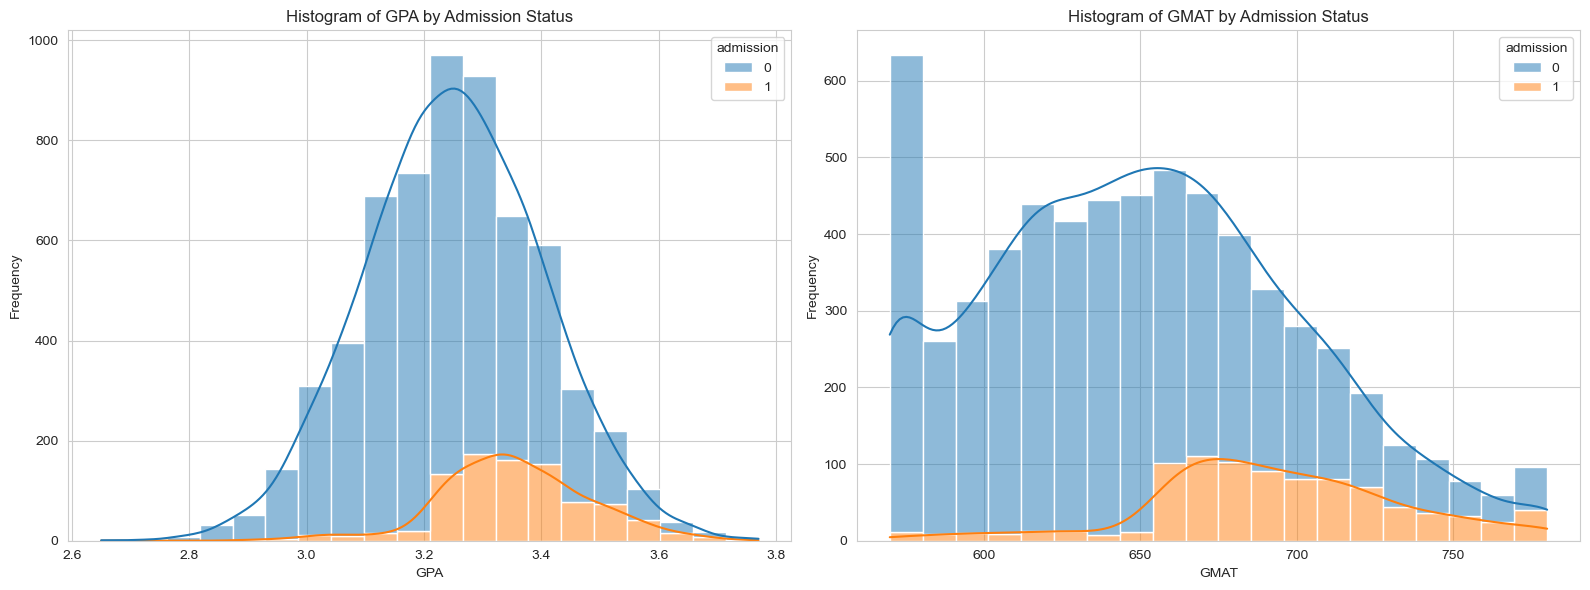

In [80]:
# 서브플롯 생성
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# GPA에 따른 입학 여부 히스토그램
sns.histplot(data=df, x='gpa', hue='admission', multiple='stack', bins=20, kde=True, ax=ax[0])
ax[0].set_title('Histogram of GPA by Admission Status')
ax[0].set_xlabel('GPA')
ax[0].set_ylabel('Frequency')
ax[0].grid(True)

# GMAT에 따른 입학 여부 히스토그램
sns.histplot(data=df, x='gmat', hue='admission', multiple='stack', bins=20, kde=True, ax=ax[1])
ax[1].set_title('Histogram of GMAT by Admission Status')
ax[1].set_xlabel('GMAT')
ax[1].set_ylabel('Frequency')
ax[1].grid(True)

plt.tight_layout()
plt.show()

In [81]:
from sklearn.preprocessing import LabelEncoder

# 범주형 특성 encoding

# gender LabelEncoding : 여자0, 남자1
encoder = LabelEncoder()
encoded_gender = encoder.fit_transform(df['gender'])
df['gender_encoded'] = encoded_gender
df[('race')].value_counts()

race
international    1842
White            1456
Asian            1147
Black             916
Hispanic          596
Other             237
Name: count, dtype: int64

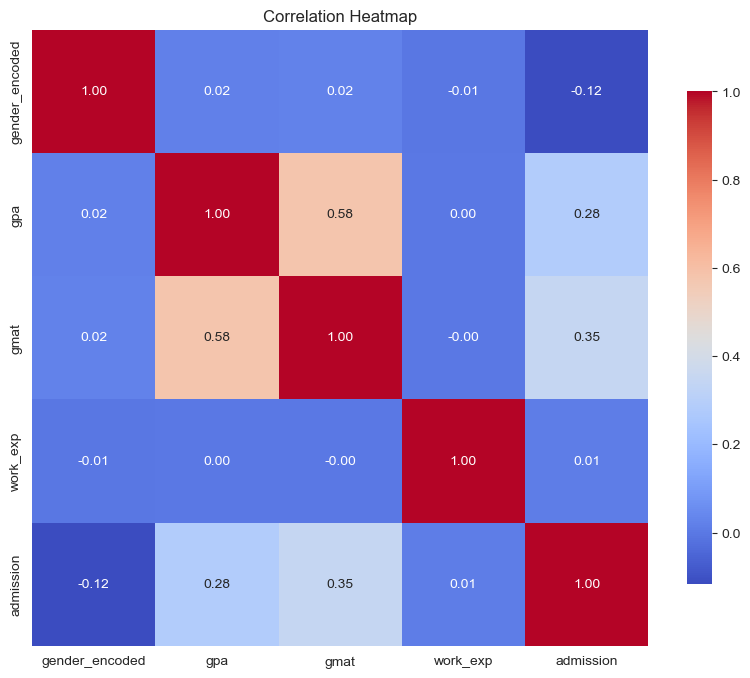

In [82]:
# heatmap
# 상관행렬 계산
mba_numerical = df[['gender_encoded', 'gpa', 'gmat', 'work_exp', 'admission']]
correlation_matrix = mba_numerical.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()

In [83]:
from sklearn.preprocessing import OneHotEncoder

# major One-hotEncoding

encoder = OneHotEncoder(sparse_output = False)
temp = pd.DataFrame(df['major'])
encoded_major = encoder.fit_transform(temp)
encoded_major_df = pd.DataFrame(encoded_major, columns = encoder.get_feature_names_out(['major']))

# 인코딩된 3열의 데이터 df에 추가
df = pd.concat([df, encoded_major_df], axis = 1)
df

,gender,gpa,major,race,gmat,work_exp,work_industry,admission,gender_encoded,major_Business,major_Humanities,major_STEM
0,Female,3.30,Business,Asian,620.0,3.0,Financial Services,1,0,1.0,0.0,0.0
1,Male,3.28,Humanities,Black,680.0,5.0,Investment Management,0,1,0.0,1.0,0.0
2,Female,3.30,Business,international,710.0,5.0,Technology,1,0,1.0,0.0,0.0
3,Male,3.47,STEM,Black,690.0,6.0,Technology,0,1,0.0,0.0,1.0
4,Male,3.35,STEM,Hispanic,590.0,5.0,Consulting,0,1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6189,Male,3.49,Business,White,640.0,5.0,Other,0,1,1.0,0.0,0.0
6190,Male,3.18,STEM,Black,670.0,4.0,Consulting,0,1,0.0,0.0,1.0
6191,Female,3.22,Business,international,680.0,5.0,Health Care,1,0,1.0,0.0,0.0
6192,Male,3.36,Business,international,590.0,5.0,Other,0,1,1.0,0.0,0.0


In [84]:
# race OneHotEncoding
encoder = OneHotEncoder(sparse_output = False)
temp = pd.DataFrame(df['race'])
encoded_race = encoder.fit_transform(temp)
encoded_race_df = pd.DataFrame(encoded_race, columns = encoder.get_feature_names_out(['race']))

# 인코딩된 3열의 데이터 df에 추가
df = pd.concat([df, encoded_race_df], axis = 1)
df

,gender,gpa,major,race,gmat,work_exp,work_industry,admission,gender_encoded,major_Business,major_Humanities,major_STEM,race_Asian,race_Black,race_Hispanic,race_Other,race_White,race_international
0,Female,3.30,Business,Asian,620.0,3.0,Financial Services,1,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Male,3.28,Humanities,Black,680.0,5.0,Investment Management,0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,Female,3.30,Business,international,710.0,5.0,Technology,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Male,3.47,STEM,Black,690.0,6.0,Technology,0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Male,3.35,STEM,Hispanic,590.0,5.0,Consulting,0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6189,Male,3.49,Business,White,640.0,5.0,Other,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6190,Male,3.18,STEM,Black,670.0,4.0,Consulting,0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
6191,Female,3.22,Business,international,680.0,5.0,Health Care,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6192,Male,3.36,Business,international,590.0,5.0,Other,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [85]:
# work_industry OneHotEncoding
encoder = OneHotEncoder(sparse_output = False)
temp = pd.DataFrame(df['work_industry'])
encoded_work_industry = encoder.fit_transform(temp)
encoded_work_industry_df = pd.DataFrame(encoded_work_industry, columns = encoder.get_feature_names_out(['work_industry']))

# 인코딩된 3열의 데이터 df에 추가
df = pd.concat([df, encoded_work_industry_df], axis = 1)

df = df.drop(['gender','major','race', 'work_industry'], axis = 1)
df

,gpa,gmat,work_exp,admission,gender_encoded,major_Business,major_Humanities,major_STEM,race_Asian,race_Black,...,work_industry_Health Care,work_industry_Investment Banking,work_industry_Investment Management,work_industry_Media/Entertainment,work_industry_Nonprofit/Gov,work_industry_Other,work_industry_PE/VC,work_industry_Real Estate,work_industry_Retail,work_industry_Technology
0,3.30,620.0,3.0,1,0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.28,680.0,5.0,0,1,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.30,710.0,5.0,1,0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3.47,690.0,6.0,0,1,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3.35,590.0,5.0,0,1,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6189,3.49,640.0,5.0,0,1,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6190,3.18,670.0,4.0,0,1,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6191,3.22,680.0,5.0,1,0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6192,3.36,590.0,5.0,0,1,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [87]:
# work_exp 범주화 #TODO 값을 각 범주의 평균값으로 잡는게 더 나을듯
print(df['work_exp'].value_counts())

sum_under3 = df.loc[df['work_exp'] <= 3, 'work_exp'].sum()
count_under3 = df[df['work_exp'] <= 3].value_counts().sum()
mean_under3 = round(sum_under3 / count_under3, 2)

sum_4to6 = df.loc[(df['work_exp'] <= 6) & (df['work_exp'] >= 4), 'work_exp'].sum()
count_4to6 = df.loc[(df['work_exp'] <= 6) & (df['work_exp'] >= 4)].value_counts().sum()
mean_4to6 = round(sum_4to6 / count_4to6, 2)


sum_upper7 = df.loc[df['work_exp'] >= 7, 'work_exp'].sum() 
count_upper7 = df[df['work_exp'] >= 7].value_counts().sum()
mean_upper7 = round(sum_upper7 / count_upper7, 2)

print(mean_under3, mean_4to6, mean_upper7)


work_exp
5.0    2419
6.0    1528
4.0    1437
3.0     369
7.0     367
8.0      38
2.0      32
9.0       2
1.0       2
Name: count, dtype: int64
2.91 5.02 7.1


In [88]:
# 범주화(대표값 = 평균)
work_exp_categorized = []

df.loc[df['work_exp'] <= 3, 'work_exp_categorized'] = mean_under3
df.loc[(df['work_exp'] <= 6) & (df['work_exp'] >= 4), 'work_exp_categorized'] = mean_4to6
df.loc[df['work_exp'] >= 7, 'work_exp_categorized'] = mean_upper7

df = df.drop('work_exp', axis = 1)
df

,gpa,gmat,admission,gender_encoded,major_Business,major_Humanities,major_STEM,race_Asian,race_Black,race_Hispanic,...,work_industry_Investment Banking,work_industry_Investment Management,work_industry_Media/Entertainment,work_industry_Nonprofit/Gov,work_industry_Other,work_industry_PE/VC,work_industry_Real Estate,work_industry_Retail,work_industry_Technology,work_exp_categorized
0,3.30,620.0,1,0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.91
1,3.28,680.0,0,1,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.02
2,3.30,710.0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.02
3,3.47,690.0,0,1,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.02
4,3.35,590.0,0,1,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6189,3.49,640.0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.02
6190,3.18,670.0,0,1,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.02
6191,3.22,680.0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.02
6192,3.36,590.0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.02


In [89]:
# 인풋 데이터, 라벨 데이터 분리
X = df.drop('admission', axis = 1)
y = df['admission']

In [90]:
from sklearn.model_selection import train_test_split

# 훈련 / 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [91]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# 특성 공학 + 스케일링 + 결정트리 파이프라인
poly = PolynomialFeatures()
scaler = StandardScaler()
dt_clf = DecisionTreeClassifier()
pipeline = Pipeline([
    ('poly_features', poly),
    ('scaler', scaler),
    ('dt_clf', dt_clf)
])

In [93]:
# 교차 검증
val_scores = cross_val_score(pipeline, X, y, cv = 5)
print("Cross_Val Scores:", val_scores)
print("Mean Cross_Val Score:", val_scores.mean())

# 하이퍼파라미터 튜닝
params = {
    'dt_clf__max_depth': [2,3,4,5,6],
    'dt_clf__min_samples_split': [2,3,4,5,6,7],
    'dt_clf__min_samples_leaf': [1,2,3,4,5,6,7]
}
grid_search_cv = GridSearchCV(pipeline, params, cv = 5, n_jobs = -1)
grid_search_cv.fit(X, y)

# 최적 파라미터와 최고 점수 추출
best_params = grid_search_cv.best_params_
best_score = grid_search_cv.best_score_

# DataFrame으로 정리
results_df = pd.DataFrame({
    'Parameter': list(best_params.keys()) + ['Best Score'],
    'Value': list(best_params.values()) + [best_score]
})

# 결과 출력
results_df

Cross_Val Scores: [0.79903148 0.8062954  0.81517353 0.78692494 0.80452342]
Mean Cross_Val Score: 0.8023897535794801


,Parameter,Value
0,dt_clf__max_depth,2.000000
1,dt_clf__min_samples_leaf,1.000000
2,dt_clf__min_samples_split,2.000000
3,Best Score,0.854698
